In [1]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pandarallel import pandarallel
import multiprocessing
from Increment_Sequence import increasing_sequence
pandarallel.initialize(progress_bar=True, nb_workers=multiprocessing.cpu_count())

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
print('Number of CPUs:', multiprocessing.cpu_count())

Number of CPUs: 40


In [3]:
files = os.listdir('./data')
# choose files without 'lrs' or 'mrs' in the name
files = [file for file in files if 'inc_seq' not in file]
files

['pythia-70m.pkl',
 'pythia-160m.pkl',
 'pythia-410m.pkl',
 'pythia-1b.pkl',
 'pythia-1.4b.pkl',
 'pythia-2.8b.pkl',
 'pythia-6.9b.pkl',
 'pythia-70m-deduped.pkl',
 'pythia-160m-deduped.pkl',
 'pythia-410m-deduped.pkl',
 'pythia-1b-deduped.pkl',
 'pythia-1.4b-deduped.pkl',
 'pythia-2.8b-deduped.pkl',
 'pythia-6.9b-deduped.pkl']

In [4]:
def get_df_with_inc_seq(file):
    df = pickle.load(open('./data/' + file, 'rb'))
    df['token_len'] = df['tokens'].parallel_apply(len)

    df['inc_seq_number_character'] = df['detokenized'].parallel_apply(increasing_sequence)
    df['inc_seq_number_special'] = df['detokenized'].parallel_apply(increasing_sequence)


    df['inc_seq_number_character_len'] = df['inc_seq_number_character'].parallel_apply(len)
    df['inc_seq_number_special_len'] = df['inc_seq_number_special'].parallel_apply(len)

    df['inc_seq_ratio'] = (df['inc_seq_number_character_len']+df['inc_seq_number_special_len'])/ df['token_len']
    pickle.dump(df, open('./data/' + file + '_with_inc_seq', 'wb'))
    return df

In [5]:
def plot_and_save_inc_seq(df, file):
    plt.figure(figsize=(10, 8))
    sns.distplot(df['inc_seq_ratio'], kde=False)
    plt.title('Distribution of ratio for ' + file)
    plt.xlabel('Ratio')
    plt.ylabel('Count')
    plt.savefig('./plots/' + file + '_inc_seq_dist.png')

/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


/tmp/ipykernel_2745751/4105944862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inc_seq_ratio'], kde=False)


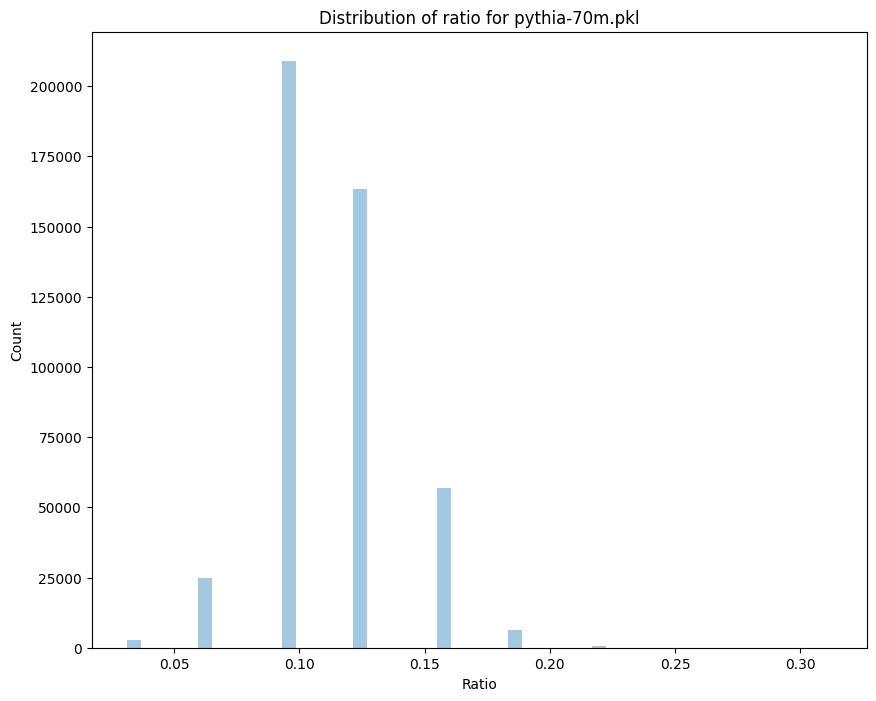

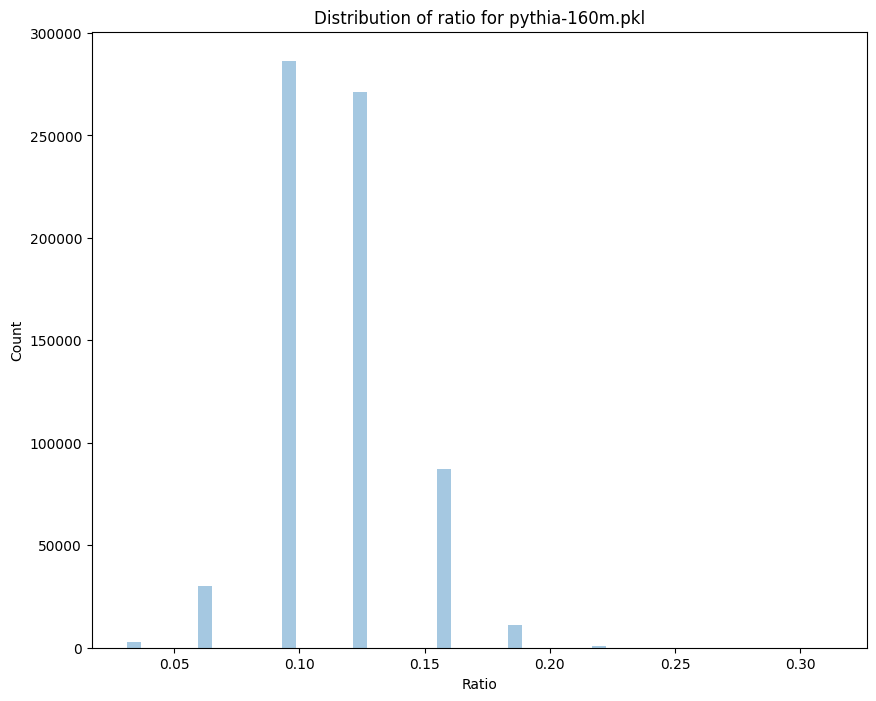

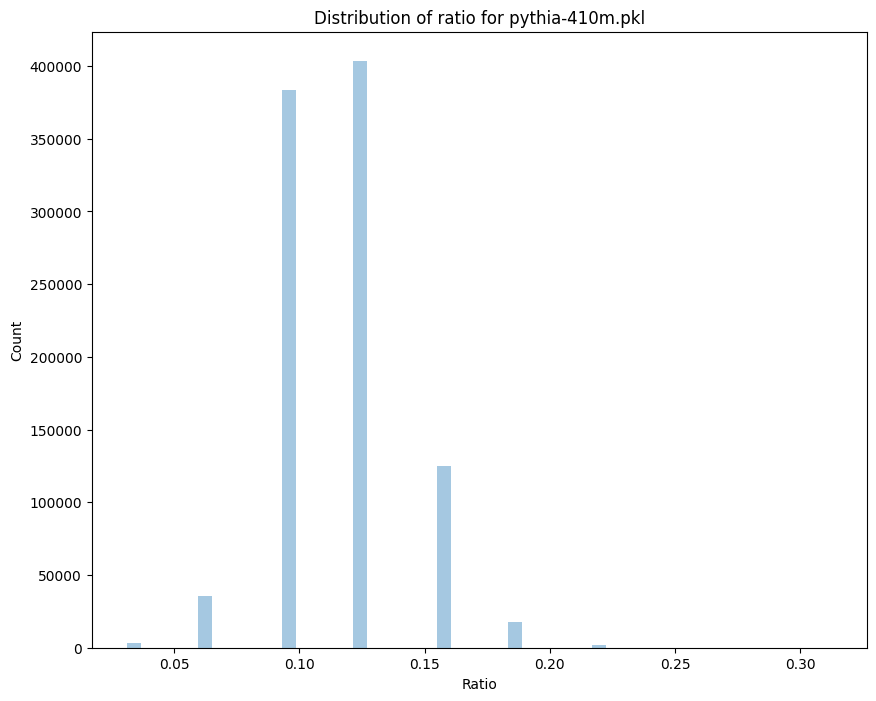

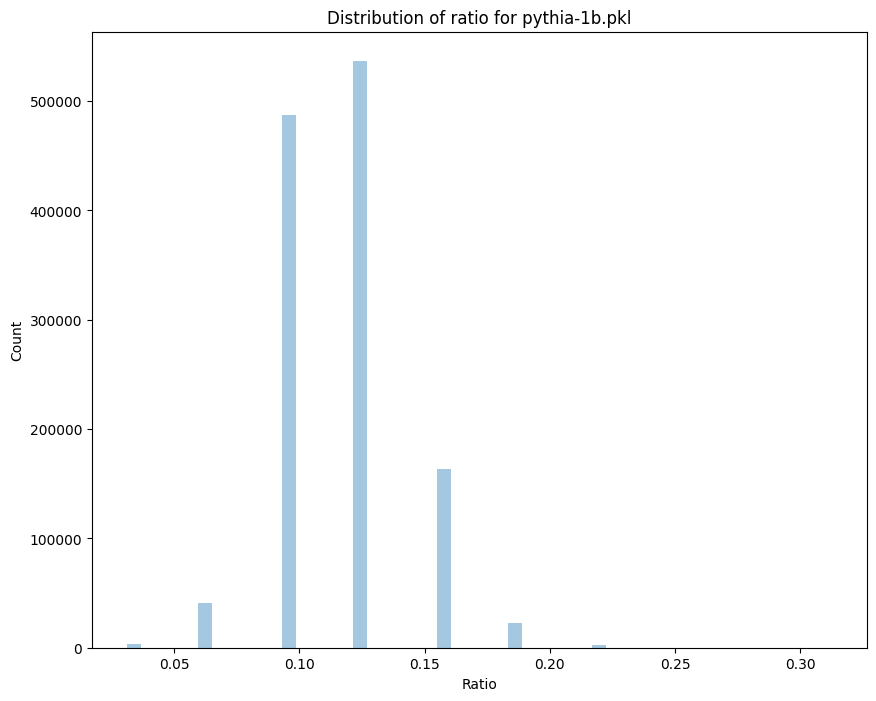

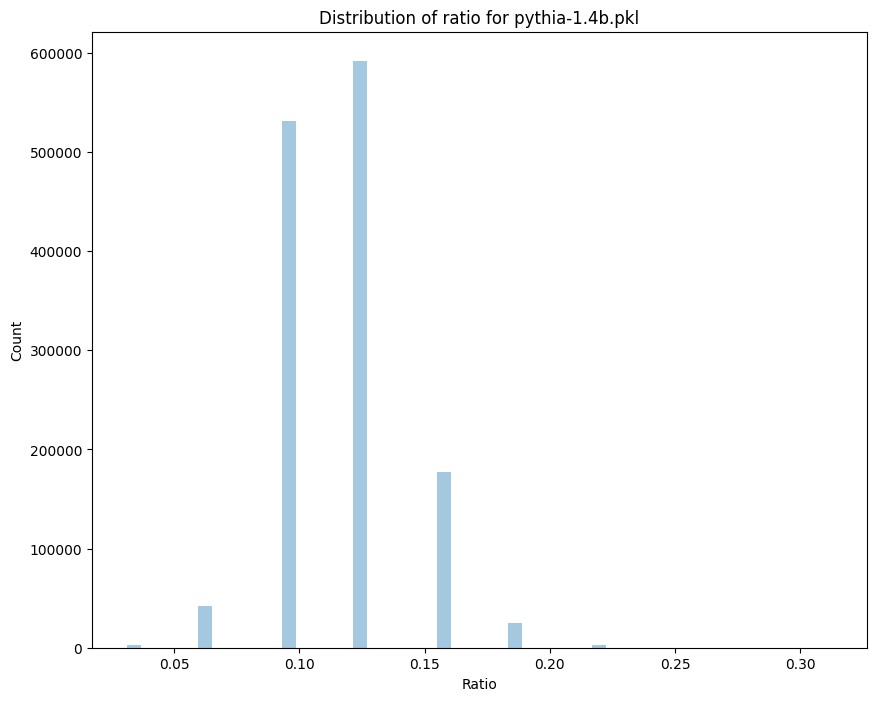

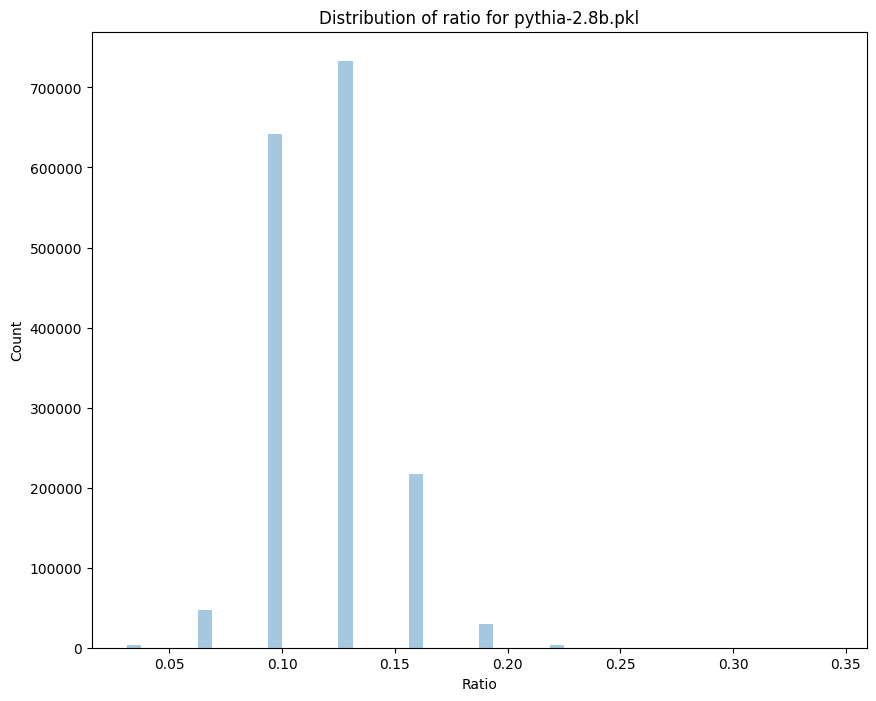

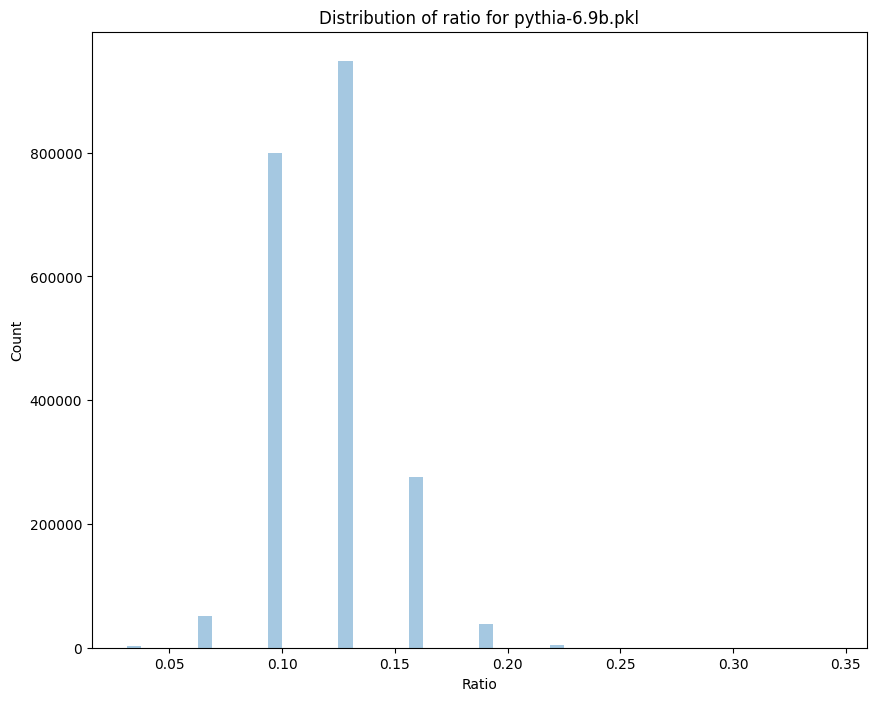

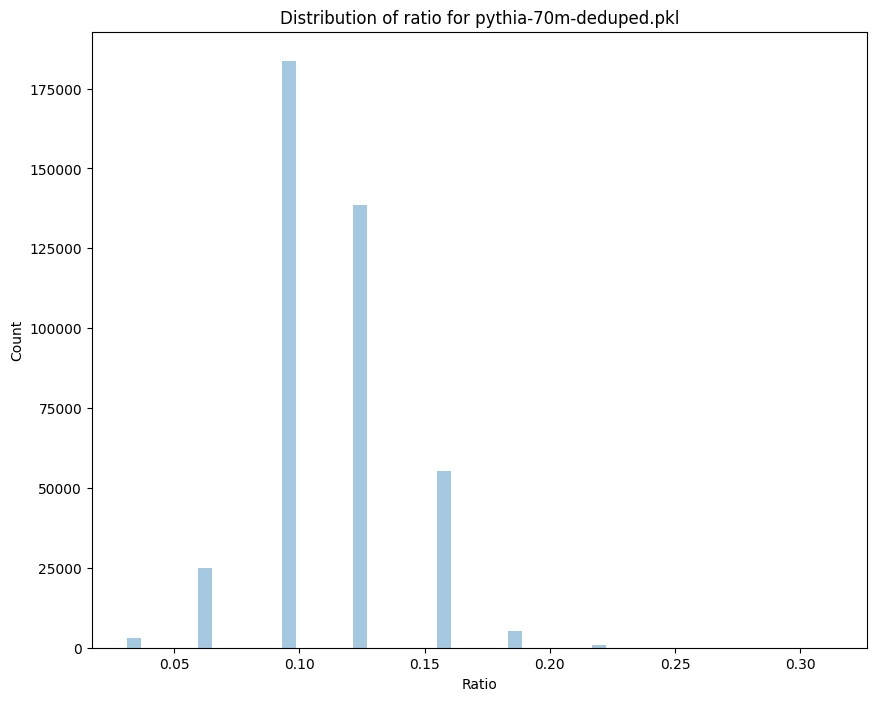

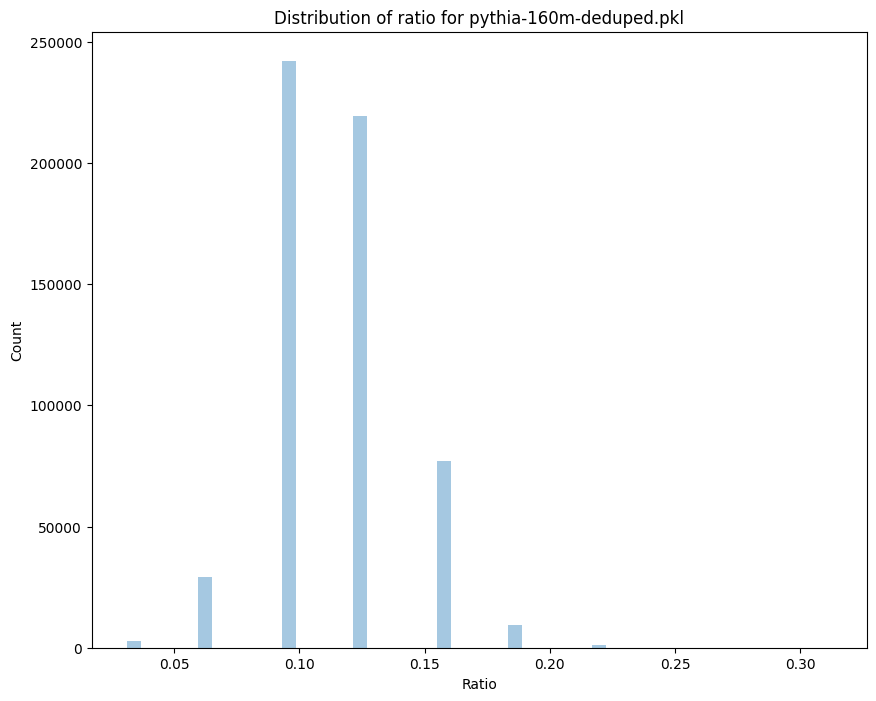

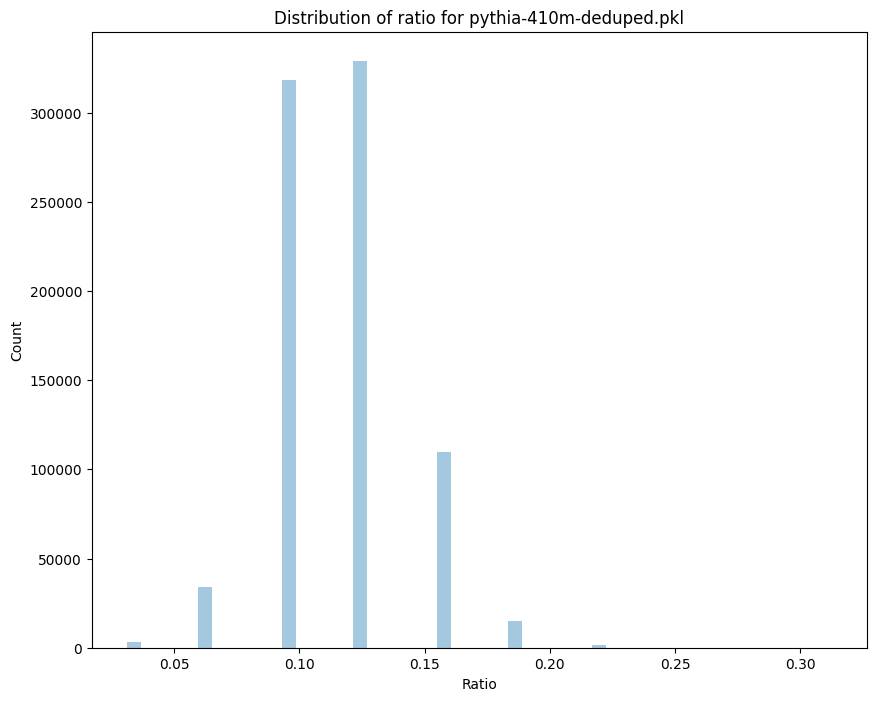

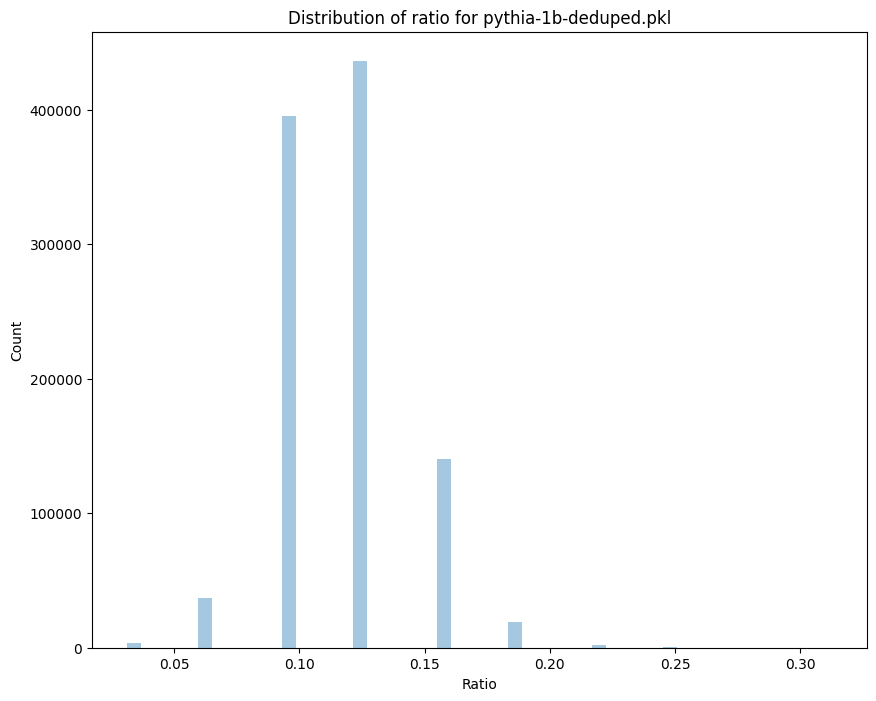

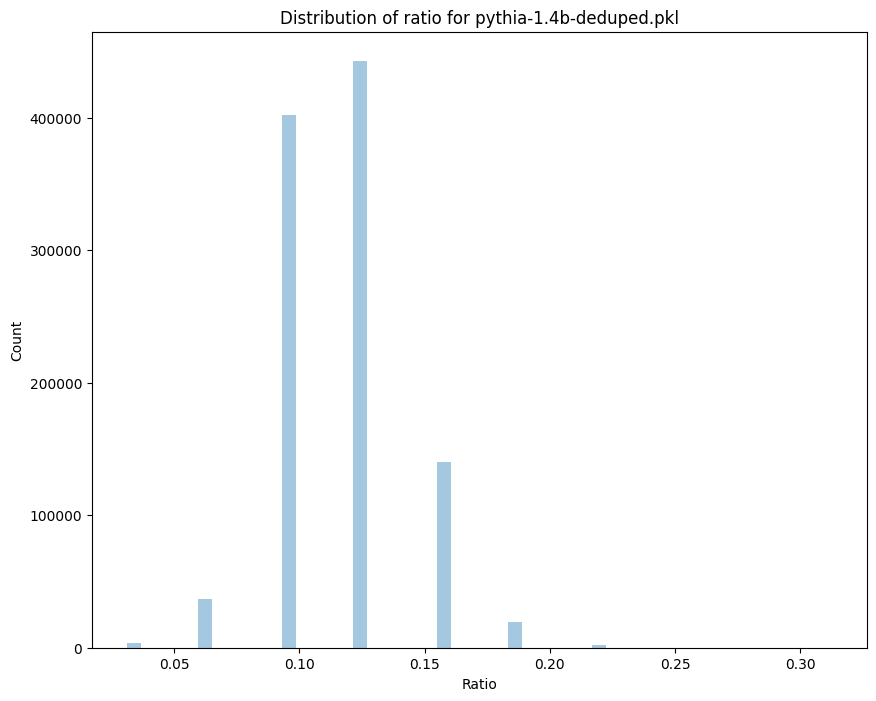

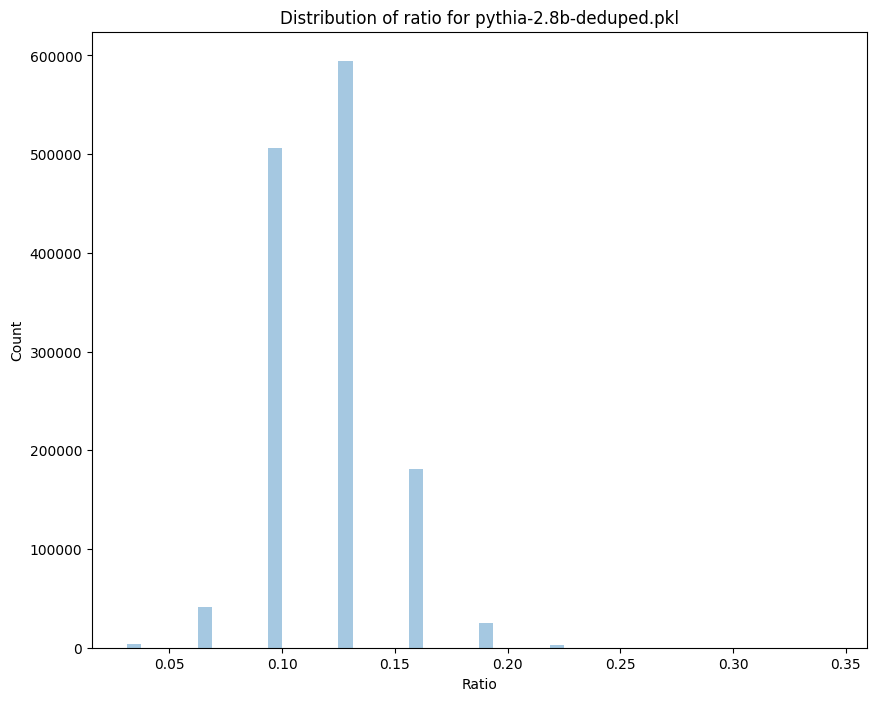

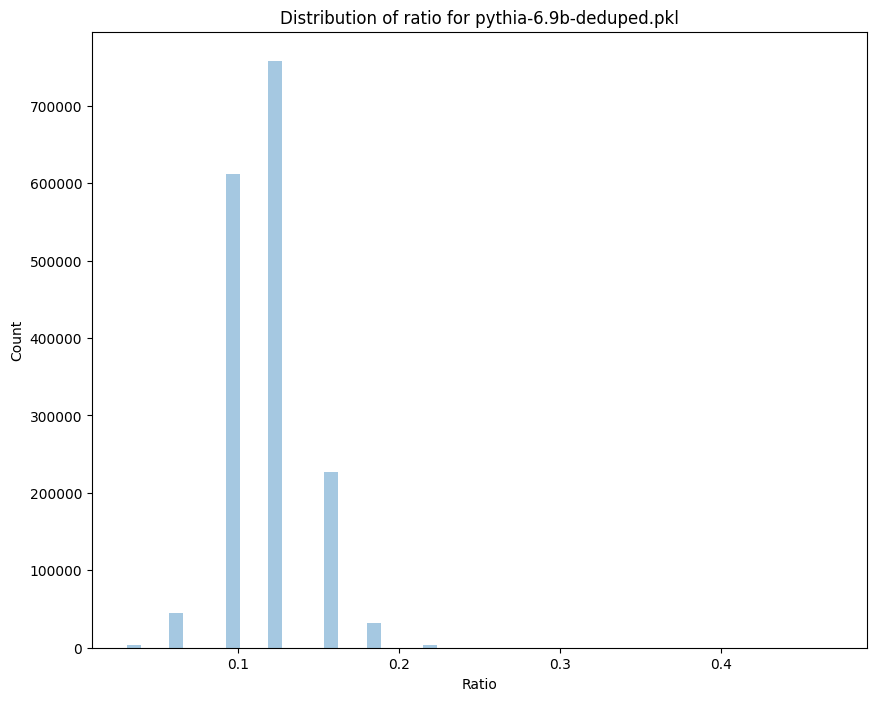

In [6]:
for file in files:
    df = get_df_with_inc_seq(file)
    plot_and_save_inc_seq(df, file)

In [9]:
# Stitch together the plots into a pdf
import glob
from fpdf import FPDF
from PIL import Image

pdf = FPDF()
# imagelist is the list with all image filenames
files = glob.glob('./plots/*.png')
# choose files with inc_seq in the name
files = [file for file in files if 'inc_seq' in file]
for image in files:
    pdf.add_page()
    pdf.image(image, 0, 0, 210, 297)
pdf.output("./plots/inc_seq.pdf", "F")

''